In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

import constants as C
import visualisations as V

from importlib import reload
reload(V)

<module 'visualisations' from 'C:\\Users\\deeth\\PycharmProjects\\QA_eyetracking\\visualisations.py'>

In [2]:
hunters = pd.read_csv('output_data/hunters.csv')
gatherers = pd.read_csv('output_data/gatherers.csv')

In [3]:
V.run_all_area_metric_plots(hunters, gatherers)

In [6]:
results = V.run_all_area_barplots_and_models(
    hunters,
    gatherers,
    save_plots=True,
    save_tables=True,
)

In [4]:
V.run_all_simplified_visit_matrices(
    hunters=hunters,
    gatherers=gatherers,
    drop_question=False,
    kinds=("label", "location"),
    which_list=("first", "last"),
    output_root="plots/simpl_visit_matrices",
    save=True,
    show=True,
)

In [3]:
strategy_results = V.run_all_strategy_plots(
    hunters=hunters,
    gatherers=gatherers,
    kind="location",
    window_len=4,
    threshold=0.5,
    output_root="plots/strategies",
    save=True,
)
print(strategy_results["hunters"]["before_after_summary"])
print(strategy_results["gatherers"]["before_after_summary"])

C:\Users\deeth\PycharmProjects\QA_eyetracking\visualisations.py:1821: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_metric


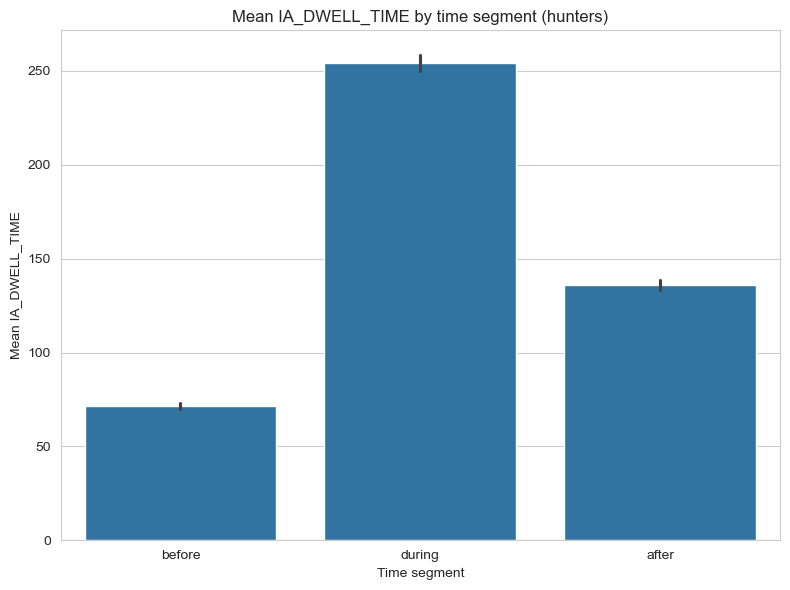

C:\Users\deeth\PycharmProjects\QA_eyetracking\visualisations.py:1821: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_metric


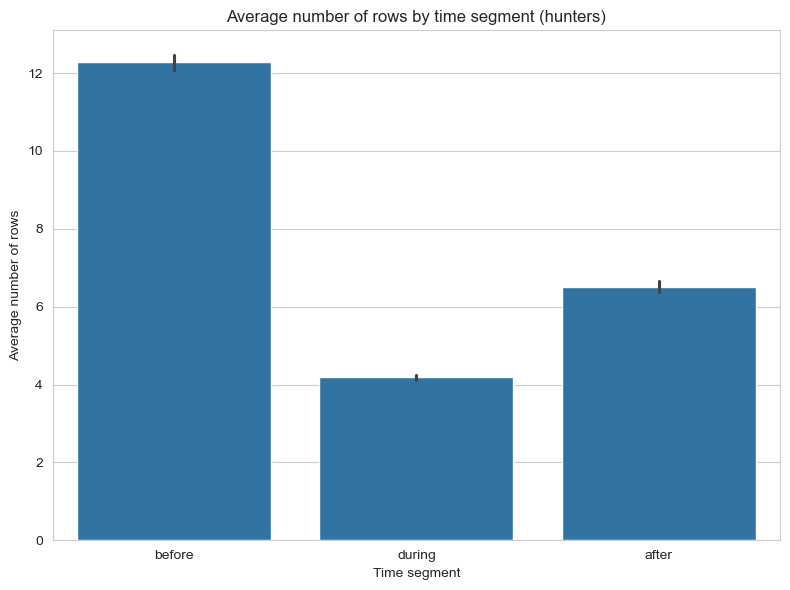

C:\Users\deeth\PycharmProjects\QA_eyetracking\visualisations.py:1821: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_metric


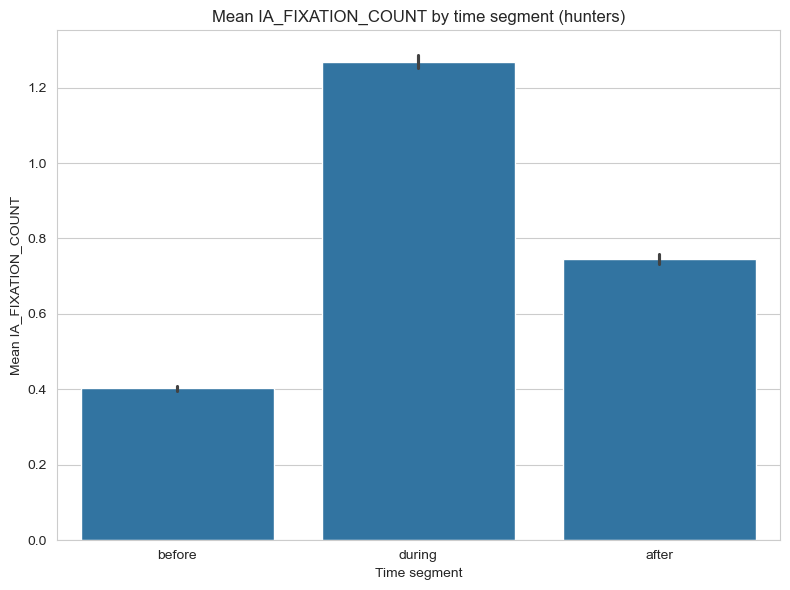

C:\Users\deeth\PycharmProjects\QA_eyetracking\visualisations.py:1821: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_metric


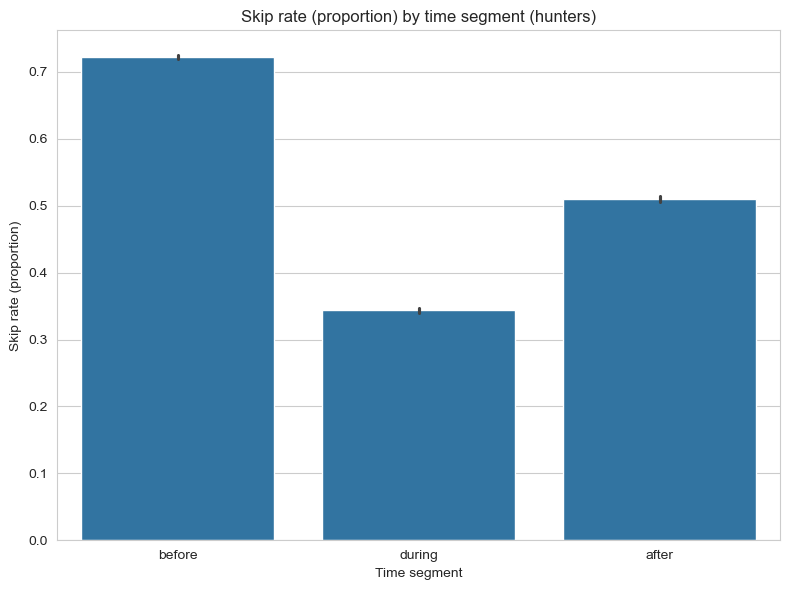

C:\Users\deeth\PycharmProjects\QA_eyetracking\visualisations.py:1821: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_metric


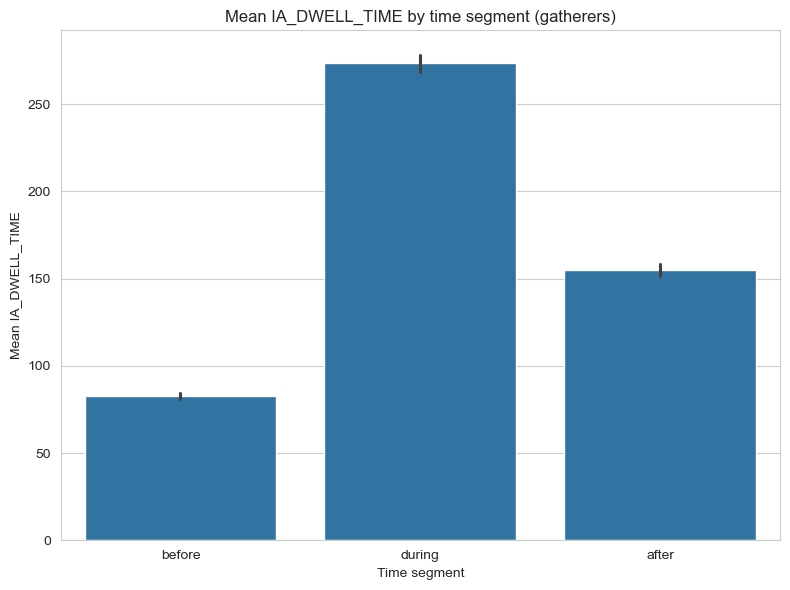

C:\Users\deeth\PycharmProjects\QA_eyetracking\visualisations.py:1821: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_metric


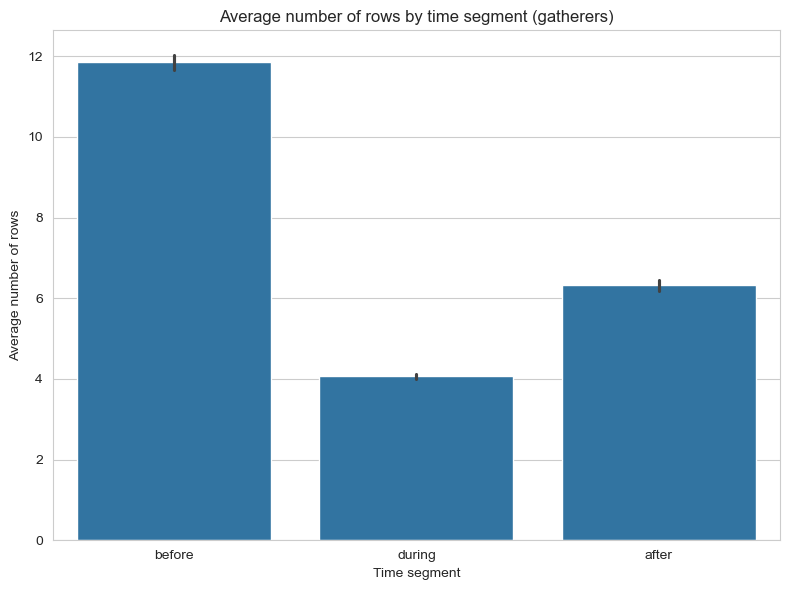

C:\Users\deeth\PycharmProjects\QA_eyetracking\visualisations.py:1821: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_metric


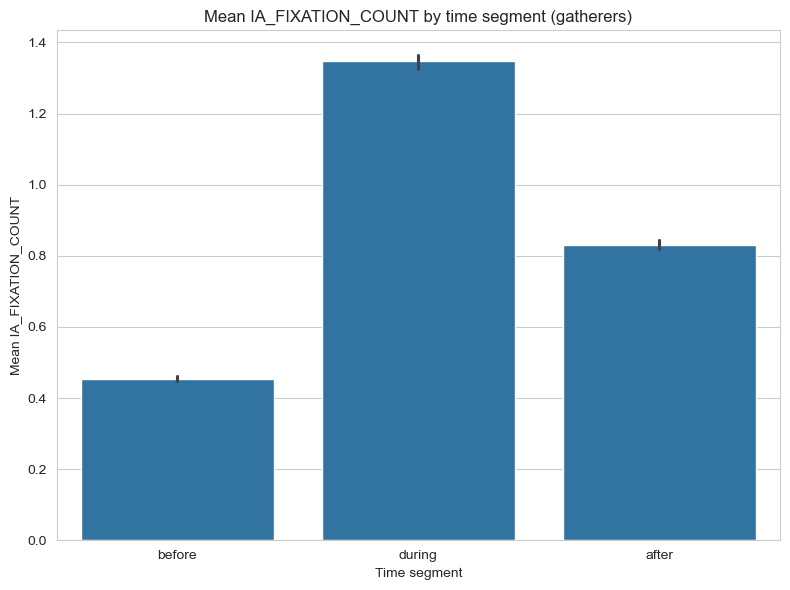

C:\Users\deeth\PycharmProjects\QA_eyetracking\visualisations.py:1821: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_metric


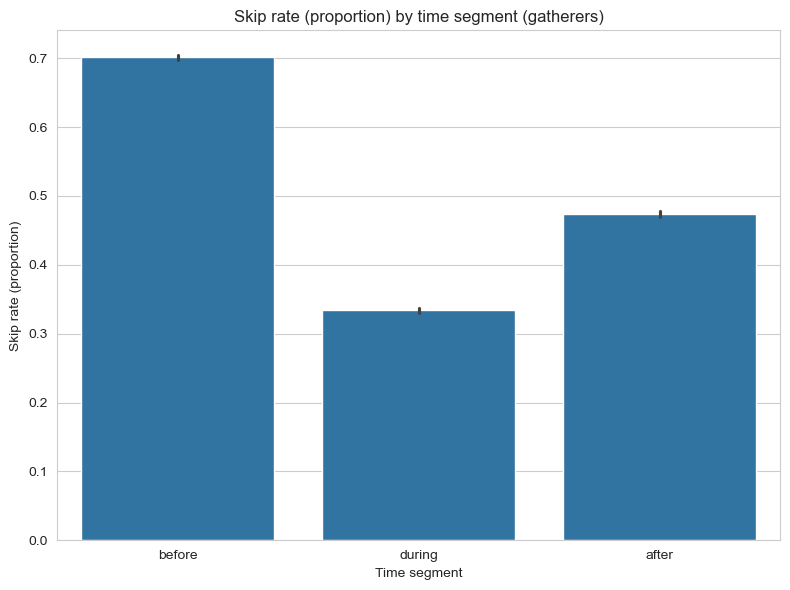

In [3]:
time_segment_results = V.run_all_time_segment_plots(
    hunters=hunters,
    gatherers=gatherers,
    group_cols=(C.PARTICIPANT_ID, C.TRIAL_ID),
    area_col=C.AREA_LABEL_COLUMN,
    selected_col=C.SELECTED_ANSWER_LABEL_COLUMN,
    dwell_col=C.IA_DWELL_TIME,
    fix_col=C.IA_FIXATIONS_COUNT,
    segment_col=C.SEGMENT_COLUMN,
    output_root="plots/time_segments",
    save=True,
)